<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 126.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 122.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 32.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 77.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 121.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 11.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
## Write your code here
print(df.duplicated(subset=df.columns.difference(['ResponseId'])).sum())
df.drop_duplicates(subset=df.columns.difference(['ResponseId']), inplace=True)
duplicate_count = df.duplicated(subset=df.columns.difference(['ResponseId'])).sum()
print(f"Number of duplicates after removal: {duplicate_count}")

487
Number of duplicates after removal: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [6]:
## Write your code here
missing_CodingActivities = df['CodingActivities'].isnull().sum()
print(f"Number of missing rows in 'CodingActivities': {missing_CodingActivities}")

Number of missing rows in 'CodingActivities': 10657


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [10]:
## Write your code here
# Impute missing values in 'CodingActivities' using forward fill
df['CodingActivities'] = df['CodingActivities'].ffill()

# Verify the number of missing values after imputation
missing_CodingActivities = df['CodingActivities'].isnull().sum()
print(f"Number of missing rows in 'CodingActivities' after imputation: {missing_CodingActivities}")


Number of missing rows in 'CodingActivities' after imputation: 0


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [11]:
## Write your code here
# Step 1: Identify compensation-related columns
compensation_columns = [col for col in df.columns if 'Comp' in col]
print(f"Compensation-related columns: {compensation_columns}")

# Step 2: Check for missing values in a compensation column (e.g., ConvertedCompYearly)
missing_values = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values in ConvertedCompYearly: {missing_values}")

Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']
Missing values in ConvertedCompYearly: 41515


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [17]:
# Fill NaN values with the median of the columdf['ConvertedCompYearly'] n
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())


In [18]:
## Write your code here

!pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling
scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Verify normalization
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0              65000.0                    0.003998
1              65000.0                    0.003998
2              65000.0                    0.003998
3              65000.0                    0.003998
4              65000.0                    0.003998


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [19]:
## Write your code here
from scipy.stats import zscore

# Apply Z-score normalization
df['ConvertedCompYearly_Zscore'] = zscore(df['ConvertedCompYearly'], nan_policy='omit')

# Verify normalization
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0              65000.0                   -0.067767
1              65000.0                   -0.067767
2              65000.0                   -0.067767
3              65000.0                   -0.067767
4              65000.0                   -0.067767


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.3 MB/s eta 0:00:00


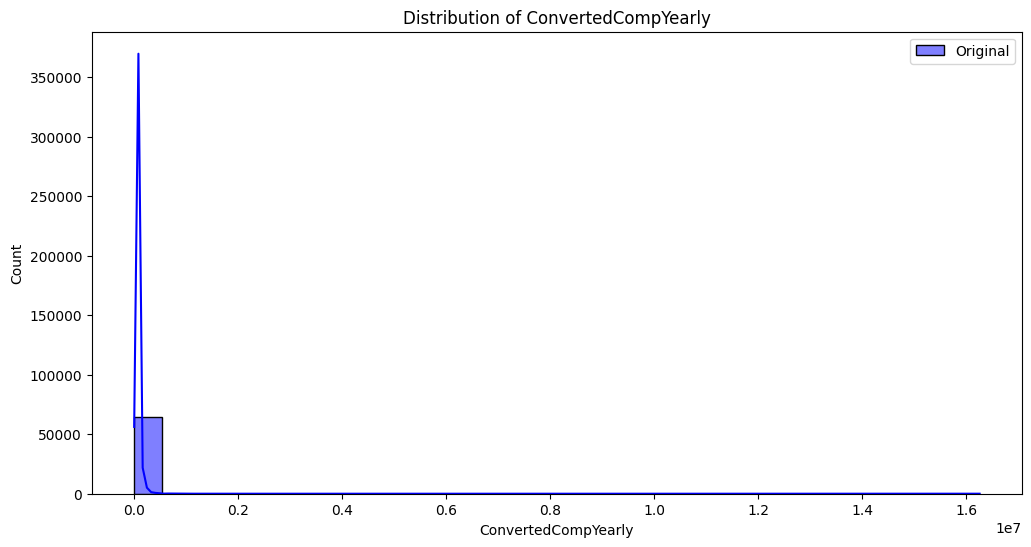

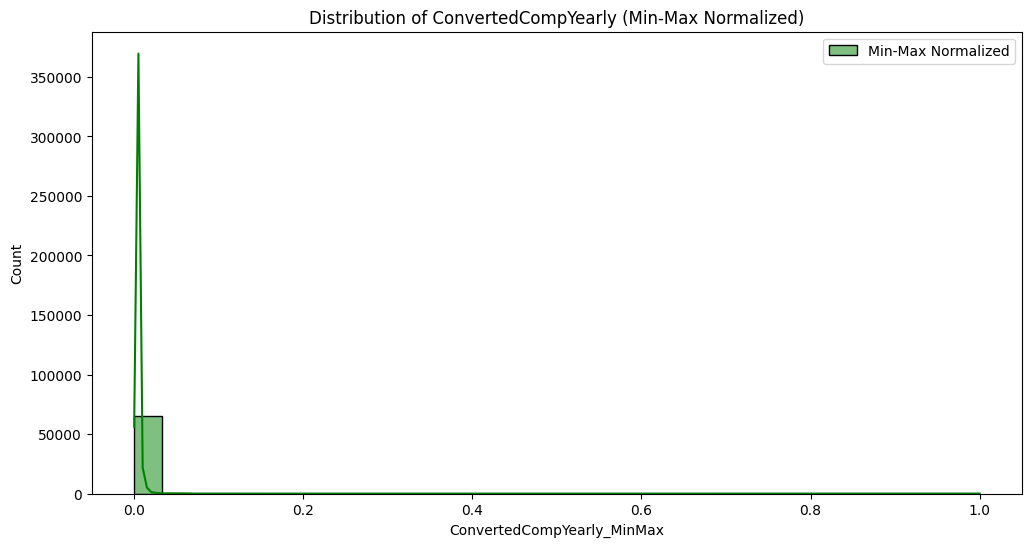

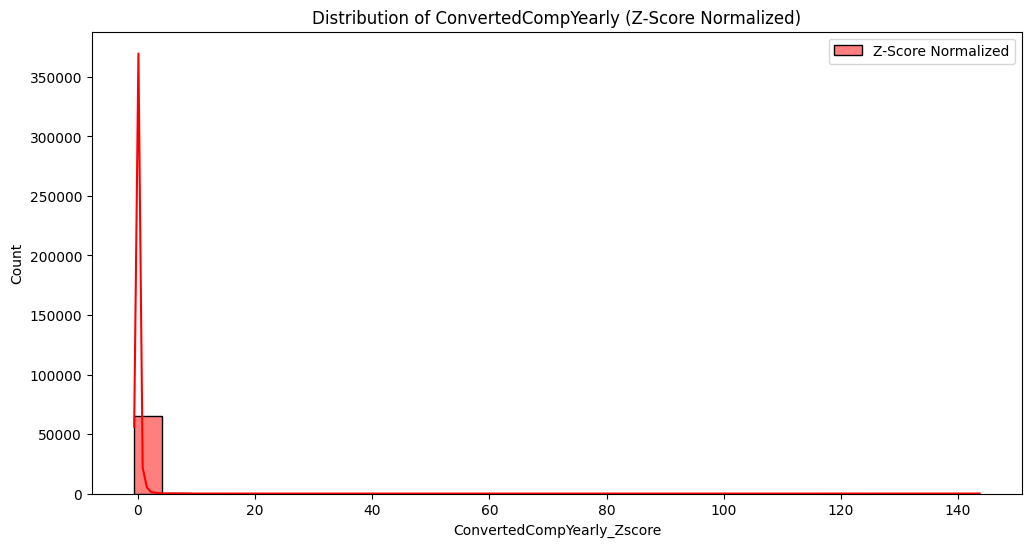

In [22]:
## Write your code here
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the original data
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedCompYearly'], kde=True, color='blue', bins=30, label='Original')
plt.title('Distribution of ConvertedCompYearly')
plt.legend()
plt.show()

# Visualize Min-Max Normalized data
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedCompYearly_MinMax'], kde=True, color='green', bins=30, label='Min-Max Normalized')
plt.title('Distribution of ConvertedCompYearly (Min-Max Normalized)')
plt.legend()
plt.show()

# Visualize Z-Score Normalized data
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True, color='red', bins=30, label='Z-Score Normalized')
plt.title('Distribution of ConvertedCompYearly (Z-Score Normalized)')
plt.legend()
plt.show()


We use the median to fill missing values in this case because:

Robustness to Outliers: The median is less sensitive to outliers than the mean. If the ConvertedCompYearly column contains extreme values (e.g., very high compensation numbers), the mean could be significantly affected, making the imputation less representative of the central tendency of the data. The median, being the middle value, gives a better estimate of the "typical" value in the presence of outliers.

Common Practice for Skewed Data: Compensation data often has a skewed distribution (with a small number of people earning extremely high salaries), and the median is often a more appropriate measure of central tendency for such data. It ensures that missing values are imputed with a value that reflects the majority of the distribution, without being distorted by extreme values.

Handling Numerical Data: For numerical columns like ConvertedCompYearly, the median is a common choice for imputation because it represents the middle of the data and avoids assumptions about the underlying distribution (like the mean, which assumes a normal distribution).

Alternatives to the Median:
Mean Imputation: If you believe that the data is relatively symmetrically distributed and not heavily skewed, you could use the mean, which could give a reasonable estimate for missing values.

Mode: For categorical data or when a "most common" value is needed, you might use the mode (most frequent value).

Forward or Backward Fill: If the column represents time series or sequential data, you may choose to fill missing values using the last known value (forward fill) or the next known value (backward fill).

In summary:
The median is often chosen for imputation when the data is skewed or contains outliers, which is common for compensation-related data. It helps ensure the imputed values are reasonable without distorting the overall distribution.

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
